<a href="https://colab.research.google.com/github/Josh413/Forecasting-Models-UConn-Research-2025-/blob/main/Time_Series_Project(UConn_Research).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

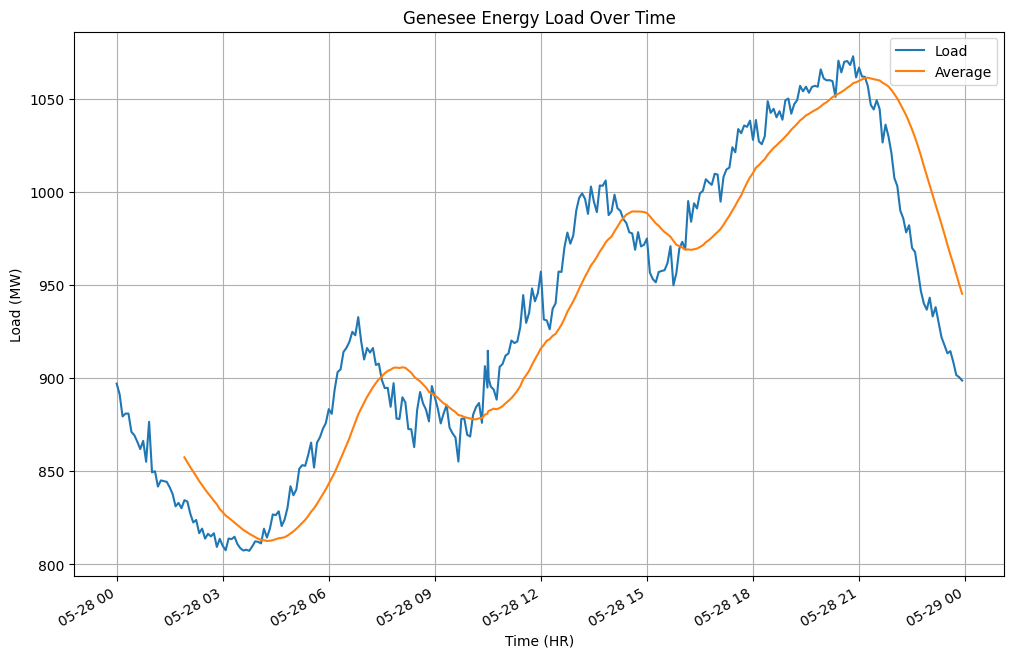

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

df=pd.read_csv('NYISO.csv')
df_genesee=df[df['Name']=='GENESE'].copy()
df_genesee['Time Stamp'] = pd.to_datetime(df_genesee['Time Stamp'])

df_genesee.set_index('Time Stamp', inplace=True)
df_numeric = df_genesee.select_dtypes(include='number')
df_hourly = df_numeric.resample('h').mean()

df_genesee['Average'] = df_genesee['Load'].rolling(window=24).mean()
df_genesee[['Load','Average']].plot(figsize=(12,8),title='Genesee Energy Load Over Time')
plt.xlabel('Time (HR)')
plt.ylabel('Load (MW)')
plt.grid(True)
plt.show()

df_reset = df_genesee.reset_index()
fig = px.line(
    df_reset,
    x='Time Stamp',
    y='Load',
    title='Genesee Energy Load Over Time (Interactive)',
    labels={'Time Stamp': 'Time (HR)', 'Load': 'Load (MW)'})
fig.show()















